In [233]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.express as px
import numpy as np

In [234]:
#Update the Database with relative paths
current_dir = os.getcwd()
WaterQualityData = pd.read_csv(os.path.join(current_dir, 'waterquality.csv'), encoding='latin1')

In [235]:
WaterQualityData

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...
529,2940,"GAPE- SAGAR LAKE, DUNGARPUR, RAJASTHAN",RAJASTHAN,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,2941,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 1...",RAJASTHAN,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,2942,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 2...",RAJASTHAN,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,2943,"LODHA TALAB, BANSWARA- DUNGARPUR ROAD, BANSWAR...",RAJASTHAN,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In [236]:
#Remove STATION CODE &  LOCATION from the data
WaterQualityData = WaterQualityData.drop(['STATION CODE', 'LOCATIONS'], axis=1)
WaterQualityData

,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...,...
529,RAJASTHAN,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,RAJASTHAN,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,RAJASTHAN,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,RAJASTHAN,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In [237]:
#Remove Null values from the data
WaterQualityData = WaterQualityData.dropna()

In [238]:
#unique STATES in the data
WaterQualityData['STATE'].unique()

array(['MAHARASHTRA', 'ANDHRA PRADESH', 'UTTAR PRADESH', 'BIHAR',
       'WEST BENGAL', 'ASSAM', 'KARNATAKA', 'HIMACHAL PRADESH', 'KERALA',
       'TAMILNADU', 'MADHYA PRADESH', 'RAJASTHAN', 'PUNJAB', 'GOA',
       'GUJARAT'], dtype=object)

In [239]:
#Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(WaterQualityData['STATE'])

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(WaterQualityData.drop('STATE', axis=1), labels_encoded, test_size=0.2, random_state=42)

#Create and train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

#Evaluate the classifier
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9111111111111111


In [240]:
#Assign Predicted Labels to the data as a new column
WaterQualityData['PREDICTED_STATE'] = label_encoder.inverse_transform(classifier.predict(WaterQualityData.drop('STATE', axis=1)))
WaterQualityData

C:\Users\Rameez\AppData\Local\Temp\ipykernel_14072\4041458643.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,PREDICTED_STATE
0,MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0,MAHARASHTRA
1,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0,MAHARASHTRA
2,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0,MAHARASHTRA
3,MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0,MAHARASHTRA
4,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0,MAHARASHTRA
...,...,...,...,...,...,...,...,...,...,...
529,RAJASTHAN,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0,RAJASTHAN
530,RAJASTHAN,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0,RAJASTHAN
531,RAJASTHAN,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0,RAJASTHAN
532,RAJASTHAN,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0,RAJASTHAN


In [241]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(WaterQualityData['STATE'], WaterQualityData['PREDICTED_STATE'])

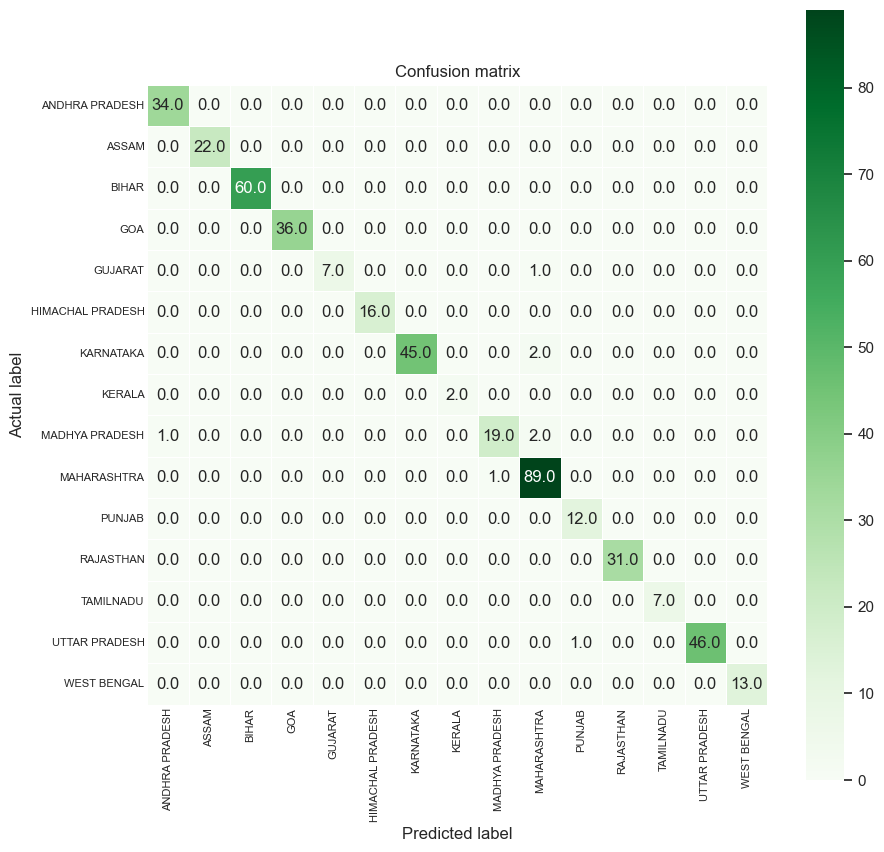

In [242]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5, labels=label_encoder.classes_, rotation=90, ha='center')
plt.yticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5, labels=label_encoder.classes_, rotation=0, va='center')

#Adjust the tick labels
plt.tick_params(axis='both', which='both', length=0, labelsize=8, pad=2)

#Add the title
plt.title('Confusion matrix')
plt.show()

In [243]:
accuracy = WaterQualityData.groupby('STATE').apply(lambda x: (x['STATE'] == x['PREDICTED_STATE']).sum() / x['STATE'].count())

fig = px.bar(accuracy, x=accuracy.index, y=accuracy.values * 100, labels={'x': 'State', 'y': 'Accuracy (%)'})
fig.update_layout(title='Accuracy of the classifier for each state', xaxis_title='State', yaxis_title='Accuracy')
fig.show()